<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Line Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on using line charts to analyze trends over time and across different categories in a dataset.



## Objectives


In this lab you will perform the following:


- Track trends in compensation across age groups and specific age ranges.

- Analyze job satisfaction trends based on experience level.

- Explore and interpret line charts to identify patterns and trends.


## Setup: Working with the Database
**Install the needed libraries**


In [29]:
!pip install pandas

In [30]:
!pip install matplotlib

**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



#### Step 1: Download the dataset


In [31]:
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

--2025-11-24 06:10:58--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  69.0MB/s    in 2.2s    

2025-11-24 06:11:01 (69.0 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



#### Step 2: Import necessary libraries and load the dataset


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

#### Load the data


In [33]:
df = pd.read_csv("survey-data.csv")

#### Display the first few rows to understand the structure of the data


In [34]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [12]:
df.info('ResponseId')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 115 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

### Task 1: Trends in Compensation Over Age Groups


##### 1. Line Chart of Median `ConvertedCompYearly` by Age Group


- Track how the median yearly compensation (ConvertedCompYearly) changes across different age groups.

- Use a line chart to visualize these trends.


/tmp/ipykernel_299/3054345376.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  median_comp_by_age = df.groupby('Age')['ConvertedCompYearly'].median().sort_index()


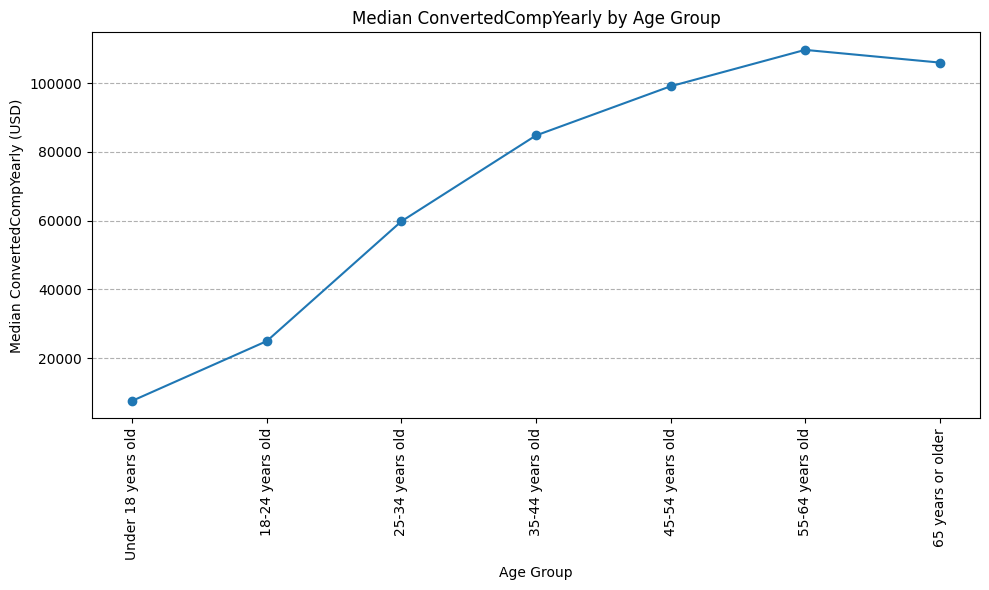

In [37]:
#Ensure 'Age' is treated as a categorical variable and ordered if desired
#For example, if you want a specific order for age groups:
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old', '45-54 years old', '55-64 years old', '65 years or older']
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True) 

#Group by 'Age Group' and calculate the median 'ConvertedCompYearly'
# .sort_index() is used to ensure the age groups are in a sensible order for plotting
median_comp_by_age = df.groupby('Age')['ConvertedCompYearly'].median().sort_index()

#Create the line chart
plt.figure(figsize=(10, 6)) # Optional: Adjust figure size
median_comp_by_age.plot(kind='line', marker='o')

plt.title('Median ConvertedCompYearly by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median ConvertedCompYearly (USD)')
plt.grid(True, axis='y', linestyle='--')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

##### 2. Line Chart of Median `ConvertedCompYearly` for Ages 25 to 45


For a closer look, plot a line chart focusing on the median compensation for respondents between ages 25 and 45.


<Figure size 1000x600 with 0 Axes>

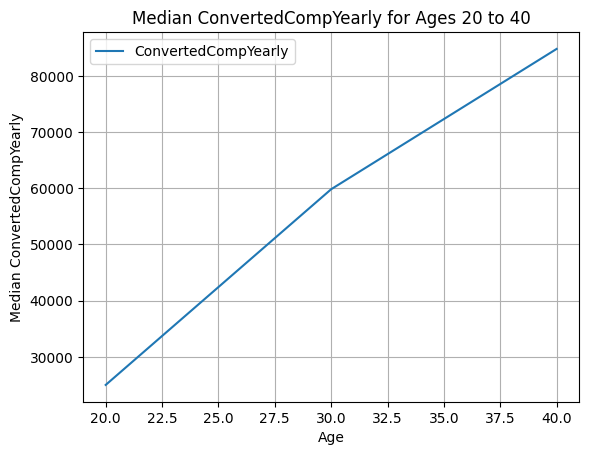

In [10]:
#map the 'Age' column to approximate numeric values
#if 'Age' is currently stored as a categorical variable (e.g., '18-24', '25-34'), it needs to be converted into a numerical representation
#this can be done by assigning a representative numerical value to each category (e.g., the midpoint of the age range).
age_mapping = {
    'Under 18 years old': 10,
    '18-24 years old': 20,
    '25-34 years old': 30,
    '35-44 years old': 40,
    '45-54 years old': 50,
    '55-64 years old': 60,
    '65 years or older': 70
}
df['Age_Numeric'] = df['Age'].map(age_mapping)

#Filter the data for ages 20 to 40
df_filtered = df[(df['Age_Numeric'] >= 20) & (df['Age_Numeric'] <= 40)]

#Group by age and calculate median
median_salary_by_age = df_filtered.groupby('Age_Numeric')['ConvertedCompYearly'].median().reset_index()

#Plot the line chart
plt.figure(figsize=(10, 6))
median_salary_by_age.plot(x='Age_Numeric', y='ConvertedCompYearly', kind='line', title='Median ConvertedCompYearly for Ages 20 to 40')
plt.ylabel('Median ConvertedCompYearly')
plt.xlabel('Age')
plt.grid(True)
plt.show()

### Task 2: Trends in Job Satisfaction by Experience Level



##### 1. Line Chart of Job Satisfaction (`JobSatPoints_6`) by Experience Level



- Use a column that approximates experience level to analyze how job satisfaction changes with experience.

- If needed, substitute an available experience-related column for `Experience`.


In [14]:
#Check unique value
print('\nThere are', df['YearsCodePro'].nunique(), 'unique YearsCodePro values in the survey:')
print(df['YearsCodePro'].value_counts())


There are 52 unique YearsCodePro values in the survey:
YearsCodePro
2                     4168
3                     4093
5                     3526
10                    3251
4                     3215
Less than 1 year      2856
6                     2843
1                     2639
8                     2549
7                     2517
12                    1777
15                    1635
20                    1549
9                     1493
11                    1312
13                    1127
14                    1082
25                     998
16                     946
18                     867
17                     814
30                     689
24                     632
19                     516
22                     492
23                     448
26                     426
27                     380
21                     380
28                     342
35                     285
29                     196
40                     194
32                     194
34           

In [15]:
#replace Less than 1 year with 0.5 year & More than 50 years with 55 years
df['YearsCodePro'] = df['YearsCodePro'].replace({'Less than 1 year': '0.5', 'More than 50 years': '55'})

#check after replacement
print('There are', df['YearsCodePro'].nunique(), 'unique YearsCodePro in the survey:')
print(df['YearsCodePro'].value_counts())

#convert column to numeric
# non-convertible values (like NaNs in a different format) into NaN (Not a Number).
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

There are 52 unique YearsCodePro in the survey:
YearsCodePro
2      4168
3      4093
5      3526
10     3251
4      3215
0.5    2856
6      2843
1      2639
8      2549
7      2517
12     1777
15     1635
20     1549
9      1493
11     1312
13     1127
14     1082
25      998
16      946
18      867
17      814
30      689
24      632
19      516
22      492
23      448
26      426
27      380
21      380
28      342
35      285
29      196
40      194
32      194
34      169
38      134
33      132
36      119
31      106
37      104
45       56
42       55
39       54
41       51
55       50
44       42
43       37
46       21
50       14
48       14
49       11
47       10
Name: count, dtype: int64


In [16]:
#drop NaN value
df_cleaned = df.dropna(subset=['YearsCodePro_numeric'])

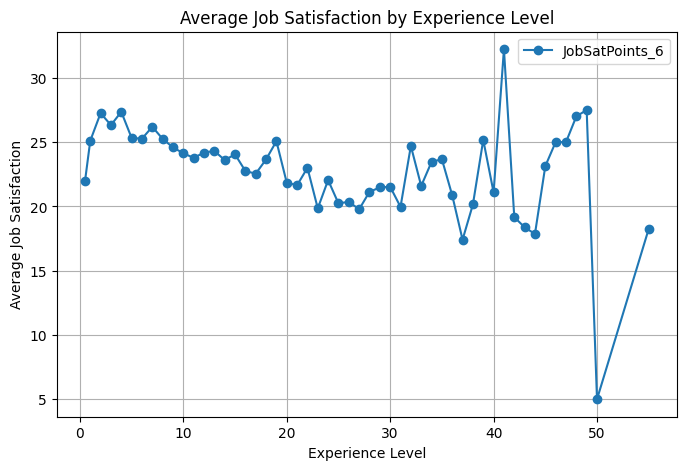

In [25]:
#Agregate the data
df_agg = df.groupby('YearsCodePro_numeric')['JobSatPoints_6'].mean().reset_index()

#Apply a specific order
df_agg = df_agg.sort_values('YearsCodePro_numeric')

#Create the line chart
df_agg.plot(kind='line', x='YearsCodePro_numeric', y='JobSatPoints_6', marker='o', figsize=(8, 5))
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.show()

In [18]:
#Check unique value
print('\nThere are', df['WorkExp'].nunique(), 'unique WorkExp values in the survey:')
print(df['WorkExp'].value_counts())


There are 51 unique WorkExp values in the survey:
WorkExp
3.0     2144
5.0     2050
10.0    2029
2.0     1885
4.0     1767
6.0     1600
7.0     1581
8.0     1554
1.0     1461
15.0    1250
12.0    1249
20.0    1074
9.0      982
11.0     823
25.0     794
13.0     740
14.0     655
16.0     600
17.0     596
18.0     587
30.0     461
24.0     382
19.0     330
22.0     323
23.0     269
26.0     254
21.0     251
27.0     217
35.0     217
28.0     210
0.0      192
40.0     139
29.0     117
32.0     101
33.0      90
36.0      89
34.0      84
31.0      83
37.0      60
38.0      55
50.0      53
42.0      47
45.0      46
39.0      37
41.0      36
43.0      34
44.0      32
46.0      12
48.0       7
47.0       5
49.0       4
Name: count, dtype: int64


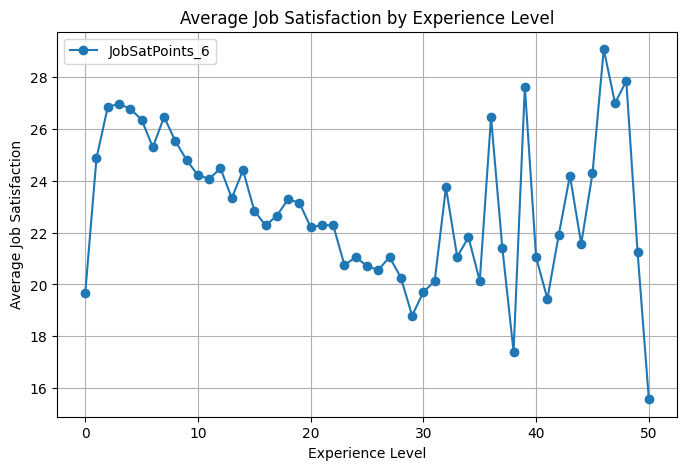

In [48]:
#drop NaN value
df_cleaned = df.dropna(subset=['WorkExp'])

#Agregate the data
df_agg1 = df.groupby('WorkExp')['JobSatPoints_6'].mean().reset_index()

#Apply a specific order
df_agg1 = df_agg1.sort_values('WorkExp')

#Create the line chart
df_agg1.plot(kind='line', x='WorkExp', y='JobSatPoints_6', marker='o', figsize=(8, 5))
plt.title('Average Job Satisfaction by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.show()

### Task 3: Trends in Job Satisfaction and Compensation by Experience

##### 1.Line Chart of Median ConvertedCompYearly Over Experience Level

- This line chart will track how median compensation (`ConvertedCompYearly`) changes with increasing experience.

- Use a column such as `WorkExp` or another relevant experience-related column.


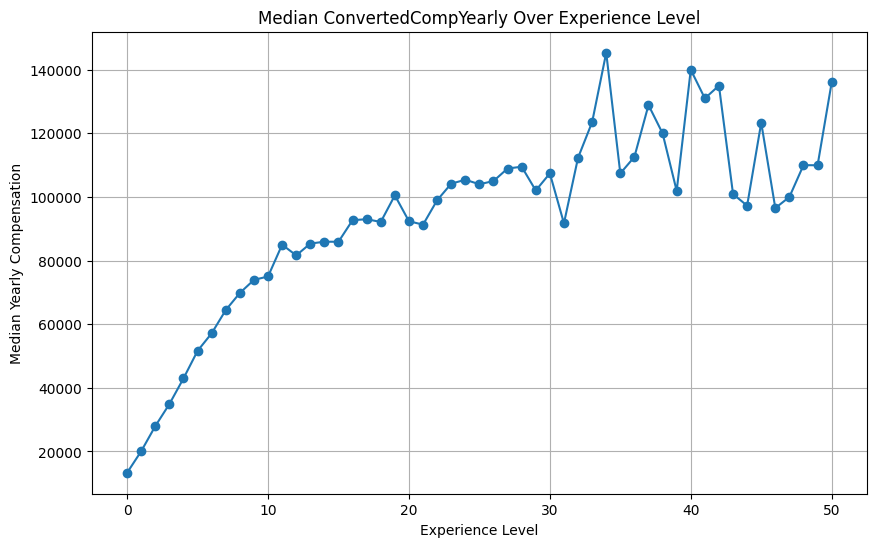

In [35]:
#Aggregate the data
median_comp_by_level = df.groupby('WorkExp')['ConvertedCompYearly'].median().sort_values()

#Apply a specific order
median_comp_by_level = median_comp_by_level.sort_index()

#Plot the line chart
plt.figure(figsize=(10, 6))
median_comp_by_level.plot(kind='line', marker='o')
plt.title('Median ConvertedCompYearly Over Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Median Yearly Compensation')
plt.grid(True)
plt.show()

##### 2.Line Chart of Job Satisfaction (`JobSatPoints_6`) Across Experience Levels

- Create a line chart to explore trends in job satisfaction (`JobSatPoints_6`) based on experience level.

- This chart will provide insight into how satisfaction correlates with experience over time


<Figure size 1000x600 with 0 Axes>

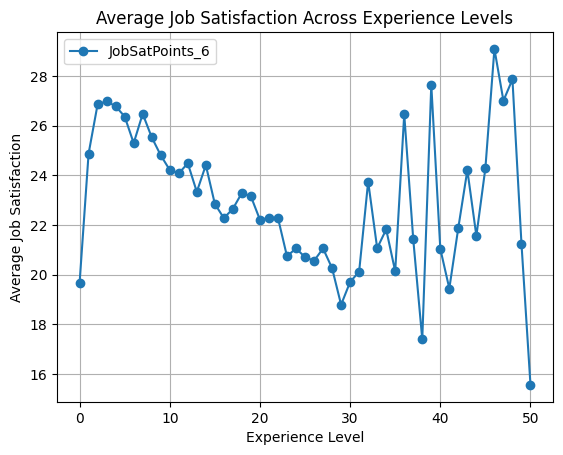

In [51]:
#drop NaN value
df_cleaned = df.dropna(subset=['WorkExp'])

#Aggregate the data
avg_job_sat = df.groupby('WorkExp')['JobSatPoints_6'].mean().reset_index()

#Apply a specific order
avg_job_sat = avg_job_sat.sort_values('WorkExp')

#Plot the line chart
plt.figure(figsize=(10, 6))
avg_job_sat.plot(kind='line', x='WorkExp', y='JobSatPoints_6',marker='o')
plt.title('Average Job Satisfaction Across Experience Levels')
plt.xlabel('Experience Level')
plt.ylabel('Average Job Satisfaction')
plt.grid(True)
plt.show()

#### Final Step: Review


In this lab, you focused on analyzing trends in compensation and job satisfaction, specifically exploring how these metrics change with age and experience levels using line charts.


In [52]:
print("\nKey Trends:")
print("- Median Compensation Yearly increases with age, reaching its highest point in the 55-64 age group, then decreasing again in the age group above 65 years.")
print("- Job Satisfaction decreases with increasing Experience Level (based on WorkExp and YearsCodePro data) up to 30 years of experience level and increases thereafter.")


Key Trends:
- Median Compensation Yearly increases with age, reaching its highest point in the 55-64 age group, then decreasing again in the age group above 65 years.
- Job Satisfaction decreases with increasing Experience Level (based on WorkExp and YearsCodePro data) up to 30 years of experience level and increases thereafter.


### Summary


In this lab, you explored essential data visualization techniques with a focus on analyzing trends using line charts. You learned to:

- Visualize the distribution of compensation across age groups to understand salary trends.

- Track changes in median compensation over various experience levels, identifying how earnings progress with experience.

- Examine trends in job satisfaction by experience, revealing how satisfaction varies throughout a developer's career.

These analyses allow for a deeper understanding of how factors like age and experience influence job satisfaction and compensation. By using line charts, you gained insights into continuous data patterns, which are invaluable for interpreting professional trends in the developer community.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--
## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2024-10-28|1.2|Madhusudhan Moole|Updated lab|
|2024-10-16|1.1|Madhusudhan Moole|Updated lab|
|2024-10-15|1.0|Raghul Ramesh|Created lab|
--!>


Copyright © IBM Corporation. All rights reserved.
